In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud

from funciones_varias import cargaCsvToDataFrame


dfMovies = cargaCsvToDataFrame("dfMovies", "datasets_eda")
dfCrew = cargaCsvToDataFrame("dfCrew", "datasets_eda")
dfCast = cargaCsvToDataFrame("dfCast", "datasets_eda")

In [3]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0                       45376 non-null  object
 1   movie_title         45376 non-null  object
 2   budget              45376 non-null  object
 3   movie_genre         45376 non-null  object
 4   franquicia          45376 non-null  object
 5   id                  45376 non-null  object
 6   original_language   45376 non-null  object
 7   overview            45376 non-null  object
 8   popularity          45376 non-null  object
 9   production_company  45376 non-null  object
 10  production_country  45376 non-null  object
 11  release_date        45376 non-null  object
 12  release_year        45376 non-null  object
 13  revenue             45376 non-null  object
 14  runtime             45376 non-null  object
 15  language            45376 non-null  object
 16  status              45

In [4]:
dfMovies.describe()


#columnas con 50% o mas de valores en 0 --> budget, franquicia, revenue, tagline, return
#genero mas repetido: Drama; aproximadamente 25% de las peliculas son de Drama
#hay 3 ids 141971
#la columna status no parece muy util ya que mas del 95% de los valores son "Released"
#idioma mas repetido: Inglés (no es sorpresa). Aproximadamente un 70% de las peliculas son en inglés
#la columna overview puede ser de gran ayuda al modelo de categorizacion ya que tiene muchos valores unicos con muchas palabras claves

#para el modelo de machine learning considero que no necesito las siguientes columnas: tagline, id, status

,,movie_title,budget,movie_genre,franquicia,id,original_language,overview,popularity,production_company,...,release_date,release_year,revenue,runtime,language,status,tagline,vote_average,vote_count,return
count,45376,45376,45376,45376,45376,45376,45376,45376,45376,45376,...,45376,45376,45376,45376,45376,45376,45376,45376,45376,45376
unique,45376,42196,1223,21,1079,45346,90,44233,43731,10459,...,17333,135,6863,354,72,7,20270,92,1820,1256
top,0,Cinderella,0.0,Drama,,141971,en,,1e-06,,...,2008-01-01,2014,0.0,90.0,English,Released,,0.0,1,0.0
freq,1,11,36490,11946,42216,3,32202,941,56,12336,...,136,1974,37969,2549,26771,44936,24978,2947,3242,40057


In [5]:
dfMovies.duplicated().sum()

0

In [6]:
dfMovies["status"].value_counts() #no creo que me sirva mucho esta columna ya que tiene un nivel de variabilidad muy bajo

status
Released           44936
Rumored              230
Post Production       97
                      80
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [7]:
dfMovies.isnull().sum()

                      0
movie_title           0
budget                0
movie_genre           0
franquicia            0
id                    0
original_language     0
overview              0
popularity            0
production_company    0
production_country    0
release_date          0
release_year          0
revenue               0
runtime               0
language              0
status                0
tagline               0
vote_average          0
vote_count            0
return                0
dtype: int64

In [8]:
dfMovies.dtypes

                      object
movie_title           object
budget                object
movie_genre           object
franquicia            object
id                    object
original_language     object
overview              object
popularity            object
production_company    object
production_country    object
release_date          object
release_year          object
revenue               object
runtime               object
language              object
status                object
tagline               object
vote_average          object
vote_count            object
return                object
dtype: object

In [9]:
#dropeo valor raro para poder analizar popularity
dfMovies.drop(dfMovies[dfMovies['popularity'] == 'Beware Of Frost Bites'].index, inplace=True)

dfMovies.replace("", 0, inplace=True)
dfMovies["budget"] = dfMovies["budget"].astype(float)
dfMovies["popularity"] = dfMovies["popularity"].astype(float) #tiene valor muy raro: 'Beware Of Frost Bites'
dfMovies["revenue"] = dfMovies["revenue"].astype(float)
dfMovies["runtime"] = dfMovies["runtime"].astype(float)
dfMovies["vote_average"] = dfMovies["vote_average"].astype(float)
dfMovies["return"] = dfMovies["return"].astype(float)



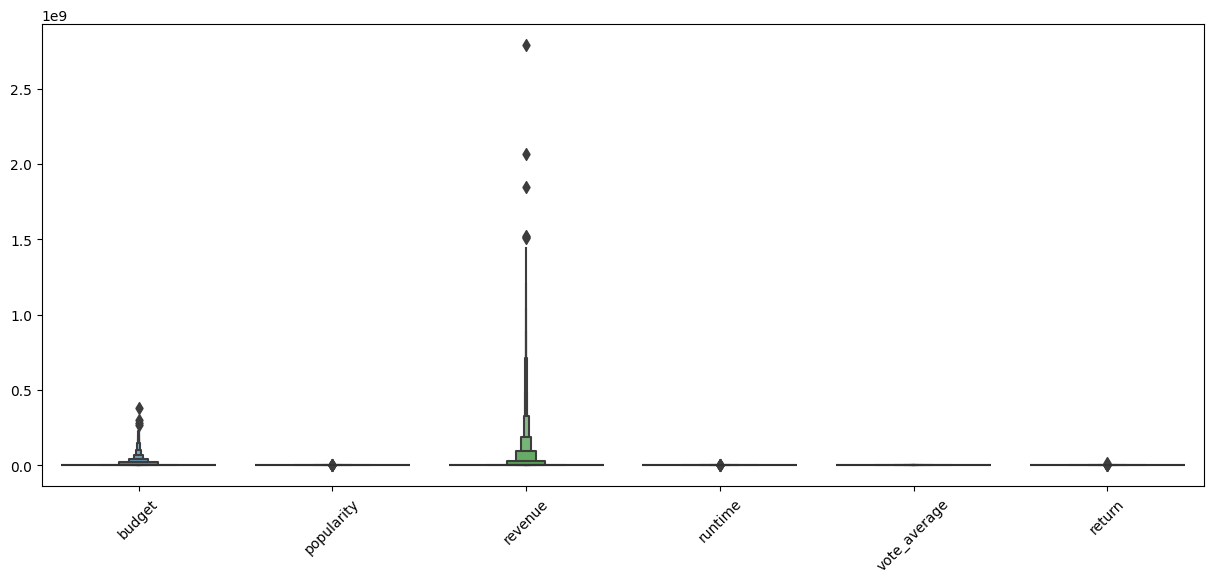

In [10]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.boxenplot(data=dfMovies)
plt.show()

#aparentemente hay bastantes outliers en mi columna revenue pero deberia revisar si son un error o si es algo que esta 
#bien por la diferencia de exito de ciertas peliculas con respecto al resto

In [11]:

dfMovies["revenue"].describe()

count    4.537600e+04
mean     1.123010e+07
std      6.438996e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

<Axes: xlabel='movie_genre', ylabel='Count'>

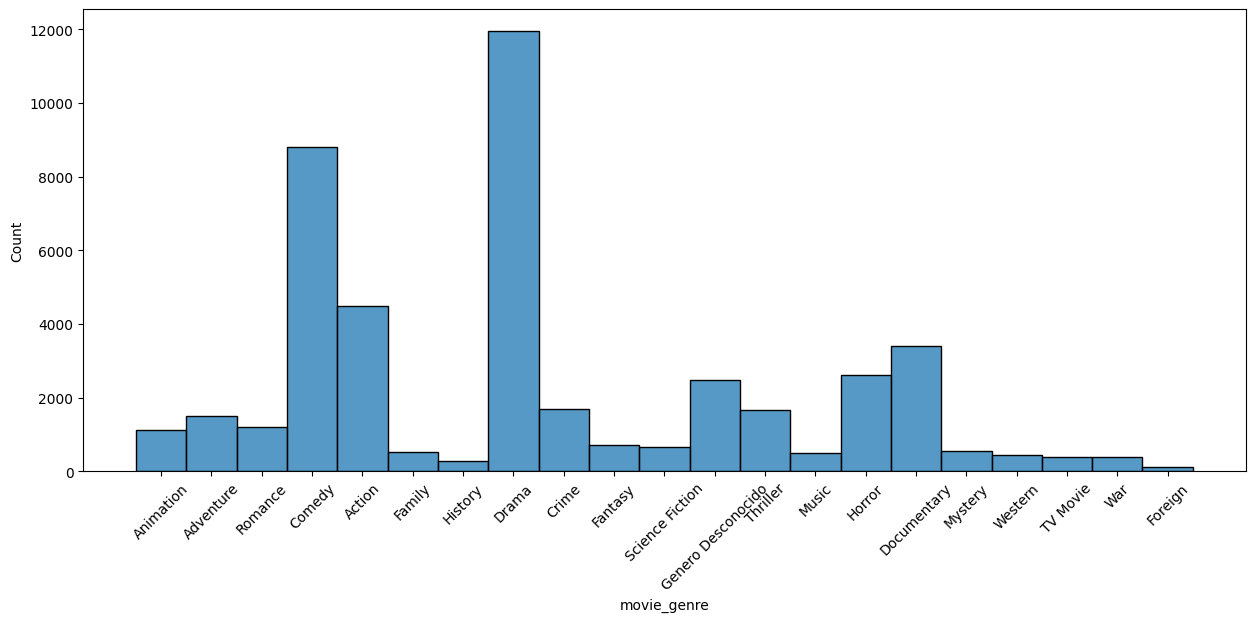

In [12]:
#la mayoria de las peliculas son de drama o comedia
#Foreign es el genero con menor cantidad de peliculas
#se mezclaron 3 productoras de peliculas entre los generos; hay una pelicula con cada una de esas productoras como genero
#considero que como su genero no es valido hay que dropearlas antes del modelo de machine learning

dfMovies.drop(dfMovies[dfMovies["movie_genre"]== "Aniplex"].index, inplace=True)
dfMovies.drop(dfMovies[dfMovies["movie_genre"]== "Odyssey Media"].index, inplace=True)
dfMovies.drop(dfMovies[dfMovies["movie_genre"]== "Carousel Productions"].index, inplace=True)

#reemplazo 0 con "Genero Desconocido"
dfMovies["movie_genre"].replace(0, "Genero Desconocido", inplace=True)

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.histplot(dfMovies["movie_genre"], bins=20)







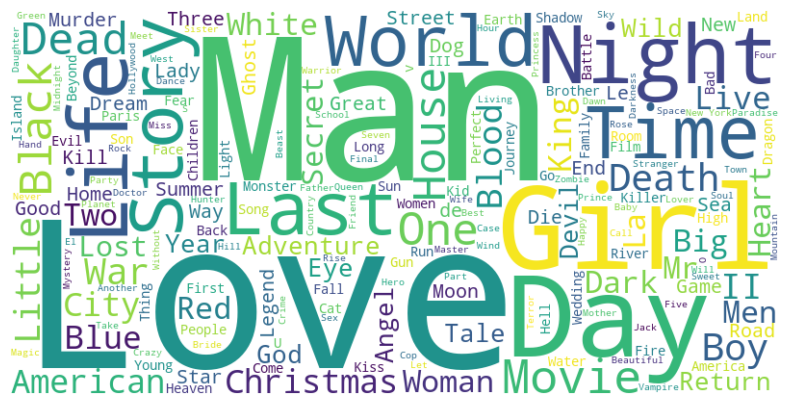

In [13]:
#nube de palabras para la columna title
#palabras mas repetidas: love, day, man, girl

#reemplazo 0 con "Valor Desconocido" para que sea tomado como string
dfMovies["movie_title"].replace(0, "Valor Desconocido", inplace=True)

titleStrings = " ".join(dfMovies["movie_title"])

wordCloud= WordCloud(width=800, height=400, background_color= 'white').generate(titleStrings)

plt.figure(figsize=(10, 5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

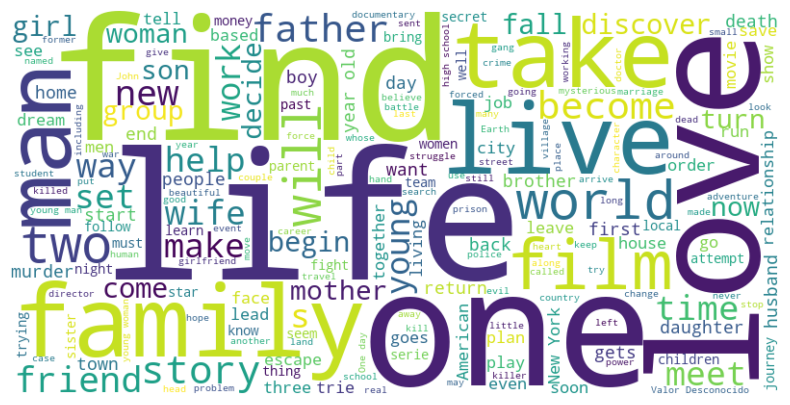

In [14]:
#nube de palabras para la columna overview
#palabras mas repetidas: life, find, love, one

#reemplazo 0 con "Valor Desconocido" para que sea tomado como string
dfMovies["overview"].replace(0, "Valor Desconocido", inplace=True)

titleStrings = " ".join(dfMovies["overview"])

wordCloud= WordCloud(width=800, height=400, background_color= 'white').generate(titleStrings)

plt.figure(figsize=(10, 5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

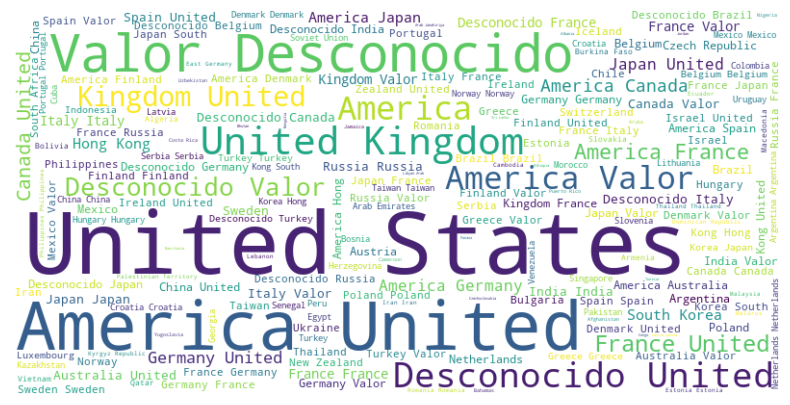

In [15]:
#nube de palabras para la columna overview
#palabras mas repetidas: life, find, love, one

#reemplazo 0 con "Valor Desconocido" para que sea tomado como string
dfMovies["production_country"].replace(0, "Valor Desconocido", inplace=True)

titleStrings = " ".join(dfMovies["production_country"])

wordCloud= WordCloud(width=800, height=400, background_color= 'white').generate(titleStrings)

plt.figure(figsize=(10, 5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#esta columna tiene muchos valores raros quizas no la use para el modelo

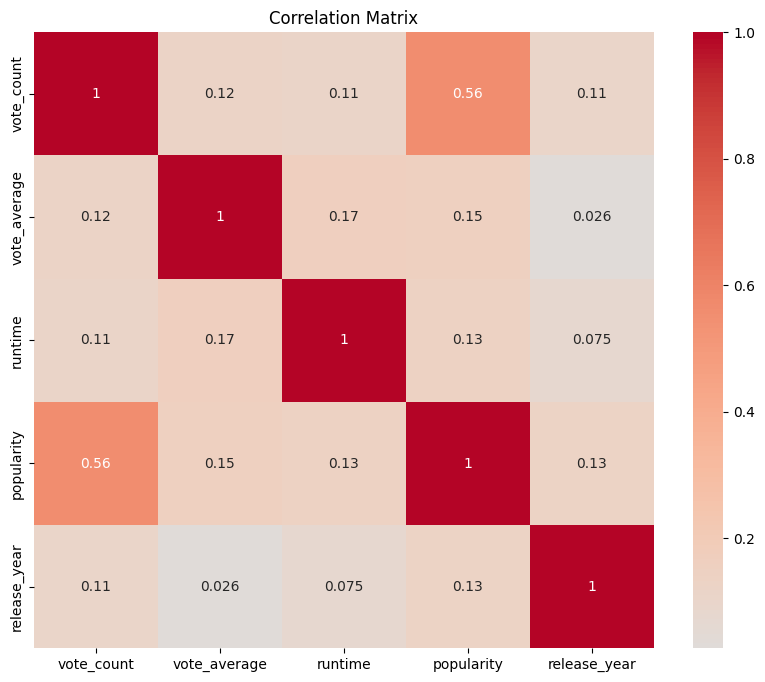

In [16]:
correlation_columns =["vote_count", "vote_average", "runtime", "popularity","release_year"]

dfCorrelation = dfMovies[correlation_columns]

correlation_matrix = dfCorrelation.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


#si no interprete mal, mientras mayor es el vote_count mayor tiende a ser el revenue de una pelicula y visceversa,
#budget y revenue tambien tienen una  correlacion relativamente alta de 0,77

In [17]:
dfMovies[dfMovies["budget"]==0].count()
dfMovies[dfMovies["revenue"]==0].count()
dfMovies[dfMovies["return"]==0].count()

#budget, return, revenue tiene muchisimo valores en 0, quizas no la use en el modelo de machine learning

                      40057
movie_title           40057
budget                40057
movie_genre           40057
franquicia            40057
id                    40057
original_language     40057
overview              40057
popularity            40057
production_company    40057
production_country    40057
release_date          40057
release_year          40057
revenue               40057
runtime               40057
language              40057
status                40057
tagline               40057
vote_average          40057
vote_count            40057
return                40057
dtype: int64

In [18]:
#ARMO DF PARA MACHINE LEARNING

#filtro el df con la info que necesito
dfCrewFiltrado = dfCrew.loc[dfCrew["job"]=="Director", ["id", "name"]]
dfCrewFiltrado["director"] = dfCrewFiltrado["name"]
dfCrewFiltrado.drop(columns=["name"], inplace=True)

#filtro el df con la info que necesito
dfCastFiltrado = dfCast.loc[dfCast["order"]=="0.0", ["id","name","character"]]
dfCastFiltrado["actor"] = dfCastFiltrado["name"]
dfCastFiltrado.drop(columns=["name"], inplace=True)

#hago join de ambos dfs
dfCastCrew = dfCrewFiltrado.merge(dfCastFiltrado, on="id",how="left")

#lleno valores nulls con string
dfCastCrew["actor"].fillna("Valor Desconocido", inplace=True)
dfCastCrew["character"].fillna("Valor Desconocido", inplace=True)
dfCastCrew.isna().sum()

#join final
dfMoviesFinal = dfMovies.merge(dfCastCrew, on="id",how="left")

#exporto el otro de los dfs que voy a usar para la sexta funcion
dfMoviesFinal.to_csv(r"C:\Users\\Administrator\\Desktop\\dfMoviesFinal.csv")


In [19]:
#hay 2700 valores desconocidos en movie genres, tengo que considerar esto porque quizas interfiera en el modelo
dfMoviesFinal[dfMoviesFinal["movie_genre"]=="Romance"].count()

                      1330
movie_title           1330
budget                1330
movie_genre           1330
franquicia            1330
id                    1330
original_language     1330
overview              1330
popularity            1330
production_company    1330
production_country    1330
release_date          1330
release_year          1330
revenue               1330
runtime               1330
language              1330
status                1330
tagline               1330
vote_average          1330
vote_count            1330
return                1330
director              1300
character             1300
actor                 1300
dtype: int64